In [1]:
import numpy as np
import matplotlib.pyplot as plt
from MCMC import MCMCModel

In [21]:
t = np.linspace(0, 10, 100)

model = MCMCModel(t)

# true_a, true_v, _ = model.fit_with_noise(0, 10, -5, 5, 100, 0.1)

a_range = (-2, 2)
v_range = (-4, 4)
num_iterations = 10000
noise_amplitude = 0.001

samples = model.metropolis_hastings(a_range, v_range, num_iterations, noise_amplitude)

i = 0

for sample in samples:
    current_a, current_v = sample
    acceptance_status = "Accepted"
    
    if i > 0:
        previous_a, previous_v = samples[i - 1]
        
        if current_a == previous_a and current_v == previous_v:
            acceptance_status = "Rejected (same as previous)"

    print(f"Trial {i+1}: a = {current_a}, v = {current_v} ({acceptance_status})")
    
    i += 1

Trial 1: a = -1.3763233679149787, v = -0.5091702976727097 (Accepted)
Trial 2: a = 0.3584534919539557, v = 3.4383091848413185 (Accepted)
Trial 3: a = 1.7272611215930729, v = -2.4139072467245724 (Accepted)
Trial 4: a = 1.7272611215930729, v = -2.4139072467245724 (Rejected (same as previous))
Trial 5: a = 1.7272611215930729, v = -2.4139072467245724 (Rejected (same as previous))
Trial 6: a = 1.7272611215930729, v = -2.4139072467245724 (Rejected (same as previous))
Trial 7: a = -1.8894731136940544, v = 2.3523091273681596 (Accepted)
Trial 8: a = -0.5984994523735154, v = -0.0241513541832461 (Accepted)
Trial 9: a = 1.2143291426208487, v = -2.262057207503606 (Accepted)
Trial 10: a = 1.2143291426208487, v = -2.262057207503606 (Rejected (same as previous))
Trial 11: a = -1.5359665186589972, v = 3.988852015516816 (Accepted)
Trial 12: a = 0.40916509354562614, v = 0.1598762507085132 (Accepted)
Trial 13: a = -0.20710085252713073, v = 3.3064377339724267 (Accepted)
Trial 14: a = -0.20710085252713073, v

In [20]:
# accepted_samples = [samples[j] for j in range(len(samples)) if j == 0 or samples[j] != samples[j - 1]]
# accepted_a = [sample[0] for sample in accepted_samples]
# accepted_v = [sample[1] for sample in accepted_samples]

# plt.figure(figsize=(12, 8))
# plt.plot(t, model.polynomial(v=true_v, a=true_a), label='True Polynomial', color='black', linewidth=2)

# for a, v in zip(accepted_a, accepted_v):
#     plt.plot(t, model.polynomial(v=v, a=a), linestyle='--', label=f'a={a}, v={v}')

# plt.title('True Polynomial vs Accepted Samples')
# plt.xlabel('t')
# plt.ylabel('Value')
# plt.legend()
# plt.grid(True)
# plt.show()

In [11]:
samples_array = np.array(samples)

In [12]:
v_samples = samples_array[:,1]
a_samples = samples_array[:,0]

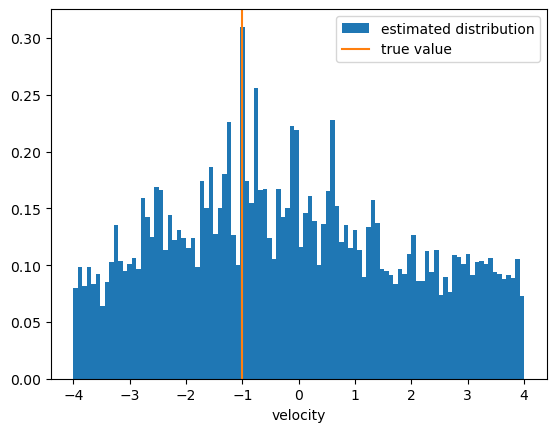

In [18]:
plt.hist(v_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("velocity")
ylim = plt.ylim()
yx =plt.gca()
plt.plot([-1,-1], ylim, label = "true value")
yx.set_ylim(ylim)
plt.legend()

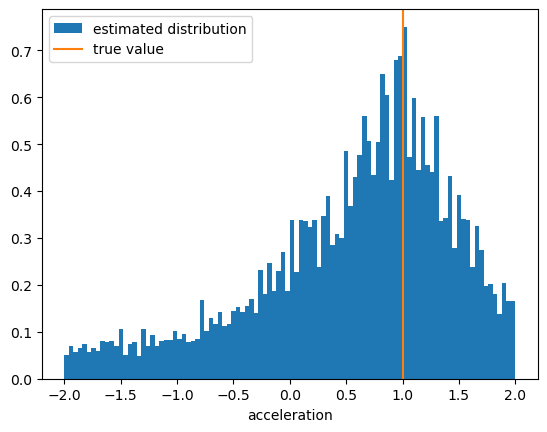

In [17]:
plt.hist(a_samples, 100, density=True, label = "estimated distribution")
plt.xlabel("acceleration")
ylim = plt.ylim()
ax = plt.gca()
plt.plot([1,1], ylim, label = "true value")
ax.set_ylim(ylim)
plt.legend()

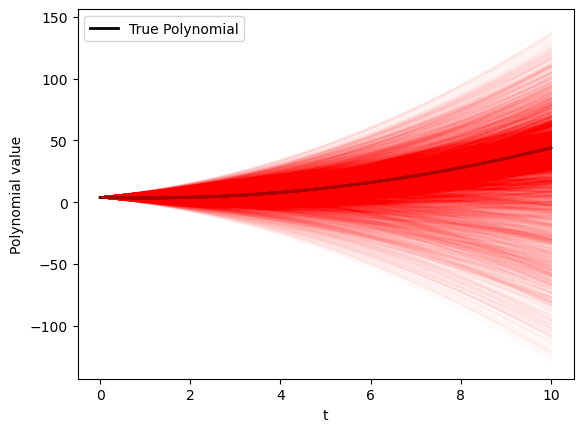

In [28]:
true_polynomial = model.polynomial(v=-1, a=1)
plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)

for sample in samples:
    current_a, current_v = sample
    plt.plot(t, model.polynomial(v=current_v, a=current_a), "r-", alpha=0.01)

plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()


In [ ]:
plt.figure()
plt.hist2d(a_samples, v_samples, bins=50, density=True, cmap='Blues')
plt.colorbar(label='Density')
plt.xlabel('Acceleration (a)')
plt.ylabel('Velocity (v)')
plt.title('2D Histogram of Samples')


true_polynomial = model.polynomial(v=-1, a=1)
plt.figure()
plt.plot(t, true_polynomial, label='True Polynomial', color='black', linewidth=2)


for sample in samples:
    current_a, current_v = sample
    plt.plot(t, model.polynomial(v=current_v, a=current_a), "r-", alpha=0.01)

plt.xlabel('t')
plt.ylabel('Polynomial value')
plt.legend()
plt.show()
